In [1]:
import numpy as np
import pandas as pd
import cv2
import json
import pickle

In [2]:
import os

In [3]:
import matplotlib
from matplotlib import pylab as plt

In [4]:
with open('/home/devel/finest_data/lidar_cam_calib_db_project/lidar/seq_1_lidar.pkl', 'rb') as _fd:
    lidar_frame0 = pickle.load(_fd)

In [5]:
lidar_xyz = lidar_frame0[:,:3]

In [6]:
lidar_xyz

array([[ 0.03922018,  1.8266954 , -0.85199845],
       [-0.20326331,  2.6598384 , -0.04656302],
       [ 0.14332962,  6.6756344 , -0.19432478],
       ...,
       [-0.11776185,  6.8841124 ,  1.8448622 ],
       [ 0.21845907,  6.8751326 ,  1.254147  ],
       [-0.08139216,  4.758016  , -0.11073255]], dtype=float32)

In [7]:
lidar_d = np.sqrt(np.sum(lidar_xyz**2,axis=1))

In [8]:
with open('/home/devel/finest_data/lidar_cam_calib_db_project/radar1/seq_0_radar1.json', 'rb') as _fd:
    radar1_frame0 = json.load(_fd)

In [9]:
df_radar1 = pd.concat([pd.DataFrame(x, index=[i]) for i,x in enumerate(radar1_frame0)])

In [10]:
df_radar1[['x','y','z']].values

array([[1.03231168, 0.54960716, 0.08372446],
       [1.03370631, 0.54960716, 0.06425327]])

In [11]:
radar1_xyz = df_radar1[['x','y','z']].values

In [12]:
rad1_lid_p0_diff = np.sqrt(np.sum((radar1_xyz[0] - lidar_xyz)**2,axis=1))

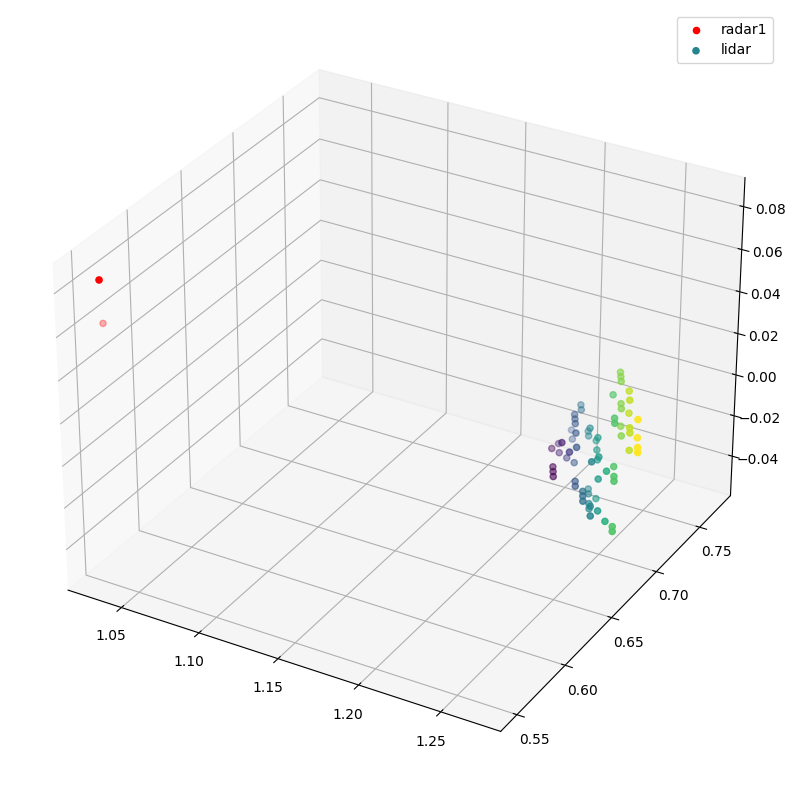

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(*df_radar1[['x','y','z']].values.T, color='red', label='radar1')
ax.scatter(*lidar_xyz[rad1_lid_p0_diff < .3].T, c=lidar_d[rad1_lid_p0_diff < .3], label='lidar')
ax.legend(loc=0)
plt.show()

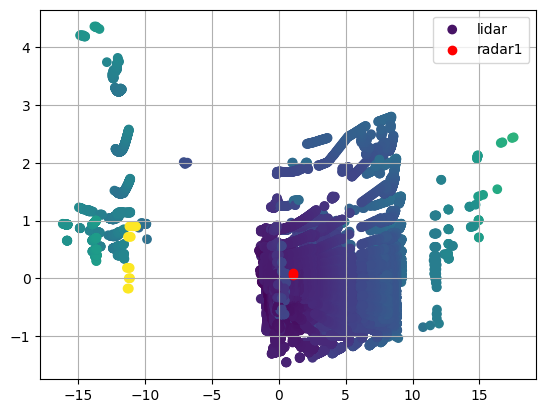

In [14]:
fig,ax = plt.subplots(1,1)
ax.scatter(*lidar_xyz.T[[0,2]], c=lidar_d, label='lidar')
ax.scatter(*radar1_xyz.T[[0,2]], color='red', label='radar1')
ax.legend(loc=0)
ax.grid()
plt.show()

In [15]:
import sys

In [16]:
sys.path.append('/home/devel/workspaces/finest_mobility/src/data_unpack/src')

In [17]:
import lidar_camera_projection

In [18]:
from importlib import reload

In [19]:
reload(lidar_camera_projection)

<module 'lidar_camera_projection' from '/home/devel/workspaces/finest_mobility/src/data_unpack/src/lidar_camera_projection.py'>

In [20]:
lidar_camera_projection.CALIB_FILE_PATH

'config/lidar_cam_calib.txt'

In [21]:
import pandas as pd

In [22]:
df_lidar_cam_sync = pd.read_csv('/home/devel/finest_data/lidar_cam_calib_db_project/lidar-to-cam-seq-sync.csv')

In [23]:
df_lidar_radar1_sync =\
    pd.read_csv('/home/devel/finest_data/lidar_cam_calib_db_project/radar1-to-lidar-seq-sync.csv')

In [79]:
df_lider_cam_radar1_sync =\
df_lidar_cam_sync.set_index('lidar').join(df_lidar_radar1_sync.set_index('lidar')).dropna().astype(np.int64)
df_lider_cam_radar1_sync

,cam,radar1
lidar,,
1,1,0
4,5,1
10,14,2
19,26,3
28,38,4
...,...,...
1420,1877,345
1423,1882,346
1429,1889,347


In [25]:
img = cv2.imread('/home/devel/finest_data/lidar_cam_calib_db_project/camera/seq_1_rgb.png',
                 cv2.IMREAD_UNCHANGED)

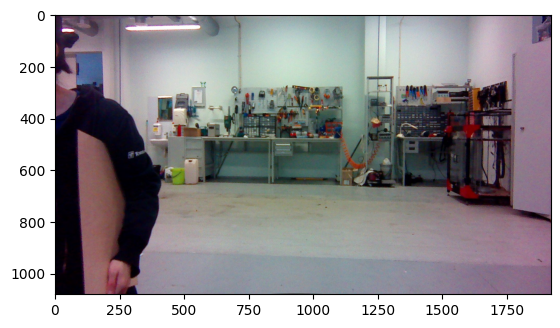

In [26]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [27]:
lidar_camera_projection.lidar_projection(img, lidar_xyz, '/tmp/tmp.pkl', '/tmp/tmp.png')

FileNotFoundError: [Errno 2] No such file or directory: 'config/lidar_cam_calib.txt'

In [28]:
lidar_cam_calib =\
lidar_camera_projection.read_calib_file('/home/devel/workspaces/finest_mobility/src/data_unpack/config/lidar_cam_calib.txt')

In [29]:
img_lidar = lidar_camera_projection.render_lidar_on_image(lidar_xyz, img, lidar_cam_calib, '/tmp/tmp.pkl')

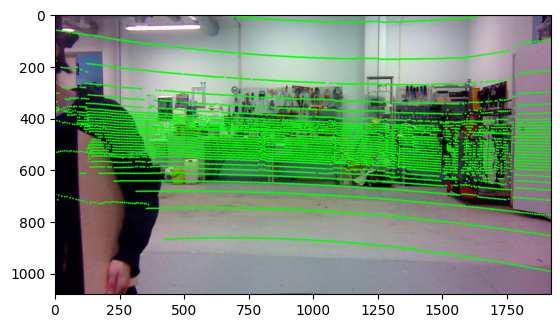

In [30]:
plt.imshow(cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB))

In [31]:
img = cv2.imread('/home/devel/finest_data/lidar_cam_calib_db_project/camera/seq_1_rgb.png',
                 cv2.IMREAD_UNCHANGED)

In [32]:
img_lidar_radar = lidar_camera_projection.render_lidar_on_image(lidar_xyz[rad1_lid_p0_diff < .3], img,
                                                                lidar_cam_calib, '/tmp/tmp.pkl')

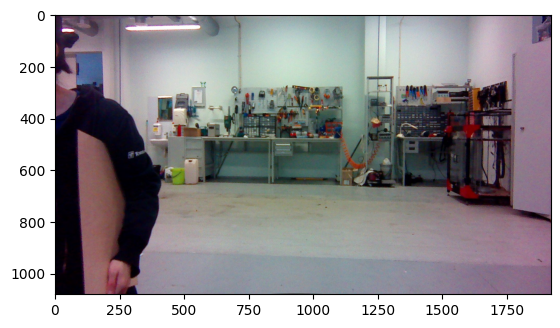

In [33]:
plt.imshow(cv2.cvtColor(img_lidar_radar, cv2.COLOR_BGR2RGB))

In [34]:
tmp_out = '/tmp/out3'

In [35]:
if not os.path.exists(tmp_out):
    os.mkdir(tmp_out)

In [36]:
df_lidar_radar1_sync.loc[1]

radar1    1
lidar     4
Name: 1, dtype: int64

In [37]:
def get_lidar_xyz(i):
    with open(f'/home/devel/finest_data/lidar_cam_calib_db_project/lidar/seq_{i}_lidar.pkl', 'rb') as _fd:
        return pickle.load(_fd)[:,:3]

In [38]:
def get_radar_xyz(i, radar='radar1'):
    with open(f'/home/devel/finest_data/lidar_cam_calib_db_project/{radar}/seq_{i}_{radar}.json', 'rb') as _fd:
        df_radar1 = pd.concat([pd.DataFrame(x, index=[i]) for i,x in enumerate(json.load(_fd))])
        return df_radar1[['x','y','z']].values

In [39]:
def get_cam_img(i):
    return cv2.imread(f'/home/devel/finest_data/lidar_cam_calib_db_project/camera/seq_{i}_rgb.png',
                      cv2.IMREAD_UNCHANGED)

In [40]:
def get_sync_frames(df_sync, lidar_seq, radar='radar1'):
    cam_seq, radar_seq = df_sync.loc[lidar_seq][['cam',radar]].values
    return (get_lidar_xyz(lidar_seq),
            get_cam_img(cam_seq),
            get_radar_xyz(radar_seq, radar))


In [41]:
def get_sync_frames_v2(df_sync, radar_seq, radar='radar1'):
    cam_seq, lidar_seq = df_sync.loc[radar_seq][['cam','lidar']].values
    return (get_lidar_xyz(lidar_seq),
            get_cam_img(cam_seq),
            get_radar_xyz(radar_seq, radar))

In [83]:
get_sync_frames_v2(df_lider_cam_radar1_sync, 0)

KeyError: 0

In [43]:
from scipy.spatial import distance_matrix

In [44]:
def get_neaerest_lidar(lidar_xyz, radar_xyz, tresh_m=.3):
    return lidar_xyz[np.unique(np.argwhere(distance_matrix(lidar_xyz, radar1_xyz) < .3)[:,0])]

In [45]:
def plot_lidar_radar(lidar_xyz, lidar_radar_xyz, radar_xyz, figure_out):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(*lidar_xyz.T, color='green', alpha=.005, label='lidar_all')
    ax.scatter(*lidar_radar_xyz.T, color='blue', label='lidar_radar')
    ax.scatter(*radar_xyz.T, color='red', label='radar1')
    ax.legend(loc=0)
    plt.savefig(figure_out)
    plt.close()

In [46]:
plot_lidar_radar(lidar_xyz, lidar_radar_xyz, radar1_xyz, '/tmp/out.png')

NameError: name 'lidar_radar_xyz' is not defined

In [47]:
radar1_cam_calib = lidar_camera_projection.read_calib_file('/home/devel/workspaces/finest_mobility/src/data_unpack/config/radar1_cam_calib.txt')

In [48]:
df_lidar_radar2_sync = pd.read_csv('/home/devel/finest_data/lidar_cam_calib_db_project/radar2-to-lidar-seq-sync.csv')

In [49]:
df_lider_cam_radar2_sync =\
df_lidar_cam_sync.set_index('lidar').join(df_lidar_radar2_sync.set_index('lidar')).dropna().astype(np.int64)

In [50]:
df_lider_cam_radar2_sync.loc[134:]

,cam,radar1
lidar,,
134,177,92
135,179,93
135,179,94
137,181,95
138,182,96
...,...,...
1434,1896,813
1436,1898,814
1437,1900,815


In [66]:
df_sync_radar1_lidar = pd.read_csv('/home/devel/finest_data/lidar_cam_calib_db_project/radar1-to-lidar-seq-sync.csv')

In [67]:
df_sync_radar2_lidar = pd.read_csv('/home/devel/finest_data/lidar_cam_calib_db_project/radar2-to-lidar-seq-sync.csv')

    

In [68]:
np_radar2_lidar_unique = np.unique(df_sync_radar2_lidar.lidar.values)

In [69]:
df_lidar_cam_radar1_sync = df_sync_radar1_lidar.set_index('lidar').join(df_lidar_cam_sync.set_index('lidar'))

In [70]:
df_lider_cam_radar2_sync = df_sync_radar2_lidar.set_index('lidar').loc[np_radar2_lidar_unique].join(df_lidar_cam_sync.set_index('lidar'))

In [71]:
lidar_cam_calib['Tr_velo_to_cam'] = np.asarray([-0.0361133 , -0.99835228,  0.04459329,  0.2,
                                                -0.02594949, -0.04367056, -0.99870892, -0.237,
                                                 0.99901074, -0.03722384, -0.02432964, -0.325  ])

In [72]:
' '.join([f'{x}' for x in lidar_cam_calib['Tr_velo_to_cam']])

'-0.0361133 -0.99835228 0.04459329 0.2 -0.02594949 -0.04367056 -0.99870892 -0.237 0.99901074 -0.03722384 -0.02432964 -0.325'

In [73]:
radar1_cam_calib['Tr_velo_to_cam'] = np.asarray([-0.0361133 , -0.99835228,  0.04459329,  0.05,
                                                 -0.02594949, -0.04367056, -0.99870892,  -0.013,
                                                  0.99901074, -0.03722384, -0.02432964,  -0.075   ])

In [74]:
' '.join([f'{x}' for x in radar1_cam_calib['Tr_velo_to_cam']])

'-0.0361133 -0.99835228 0.04459329 0.05 -0.02594949 -0.04367056 -0.99870892 -0.013 0.99901074 -0.03722384 -0.02432964 -0.075'

In [75]:
np_radar1_lidar_tr = radar1_lidar_calib['Tr_velo_to_cam'].reshape(3,4)

NameError: name 'radar1_lidar_calib' is not defined

In [62]:
tr_velo_radar = np.asarray([
    [-0.0361133 , -0.35984193,  0.93231412,  -0.2  ],
    [ 0.02594949,  0.93227044,  0.36083023,  0.237],
    [-0.99901074,  0.03722384, -0.02432964,  0.325]])

In [76]:
tr_velo_radar_1 = np.asarray([
    [1 , 0,  0,  -0.5  ],
    [0,  1,  0,  -0.4],
    [0,  0, 1,  -0.325]])

In [77]:
tmp_out = '/tmp/out8'
if not os.path.exists(tmp_out):
    os.mkdir(tmp_out)
for i in df_lider_cam_radar1_sync_v2.index.values:
    f_base = os.path.join(tmp_out, f'lidar_cam_radar_{i}')
    f_img_out = f'{f_base}.png'
    f_pkl_out = f'{f_base}.pkl'
    #f_plot_out = f'/tmp/plot_{i}.png'
    
    lidar_xyz, img, radar_xyz = get_sync_frames_v2(df_lider_cam_radar1_sync_v2, i, 'radar1')
    
    radar_xyz_tr = xyz_transform(radar_xyz, tr_velo_radar)
    
    lidar_radar_xyz = get_neaerest_lidar(lidar_xyz, radar_xyz_tr, tresh_m=.3)
    
    #plot_lidar_radar(lidar_xyz, lidar_radar_xyz, radar_xyz, f_plot_out)
    img_out = lidar_camera_projection.render_lidar_on_image(lidar_radar_xyz, img, lidar_cam_calib, f_pkl_out)
    #img_out = lidar_camera_projection.render_lidar_on_image(radar_xyz, img, radar1_cam_calib, f_pkl_out)
    
    cv2.imwrite(f_img_out, img_out)
    
    print(i)
    
    

NameError: name 'df_lider_cam_radar1_sync_v2' is not defined

In [253]:
df_lider_cam_radar2_sync_v2 =\
    df_sync_radar2_lidar.set_index('radar2').join(df_lidar_cam_sync.set_index('lidar'), on='lidar')

In [265]:
df_lider_cam_radar1_sync_v2 =\
    df_sync_radar1_lidar.set_index('radar1').join(df_lidar_cam_sync.set_index('lidar'), on='lidar')

In [267]:
df_lider_cam_radar1_sync_v2

,lidar,cam
radar1,,
0,1,1
1,4,5
2,10,14
3,19,26
4,28,38
...,...,...
345,1420,1877
346,1423,1882
347,1429,1889


In [65]:
np.unique(df_lider_cam_radar1_sync_v2.cam.values, return_counts=True)

NameError: name 'df_lider_cam_radar1_sync_v2' is not defined

In [313]:
radar1_xyz

array([[1.03231168, 0.54960716, 0.08372446],
       [1.03370631, 0.54960716, 0.06425327]])

In [274]:
radar1_lidar_calib =\
lidar_camera_projection.read_calib_file('/home/devel/workspaces/finest_mobility/src/data_unpack/config/radar1_lidar_calib.txt')

In [298]:
np.vstack([radar1_xyz.T, np.ones(len(radar1_xyz))]).T

array([[1.03231168, 0.54960716, 0.08372446, 1.        ],
       [1.03370631, 0.54960716, 0.06425327, 1.        ]])

In [318]:
def xyz_transform(np_xyz, np_mat_tr):
    assert np_mat_tr.shape == (3,4)
    assert np_xyz.shape[1] == 3
    return np.dot(np.asmatrix(np_mat_tr), np.vstack([np_xyz.T, np.ones(len(np_xyz))])).T

In [302]:
radar1_xyz_tr =\
np.dot(np.asmatrix(radar1_lidar_calib['Tr_velo_to_cam'].reshape(3,4)),
       np.vstack([radar1_xyz.T, np.ones(len(radar1_xyz))])).T

In [319]:
xyz_transform(radar1_xyz, radar1_lidar_calib['Tr_velo_to_cam'].reshape(3,4))

matrix([[-0.38224819, -0.37140598,  0.68379498],
        [-0.38316684, -0.35199612,  0.68566196]])

In [303]:
radar1_xyz_tr

matrix([[-0.38224819, -0.37140598,  0.68379498],
        [-0.38316684, -0.35199612,  0.68566196]])

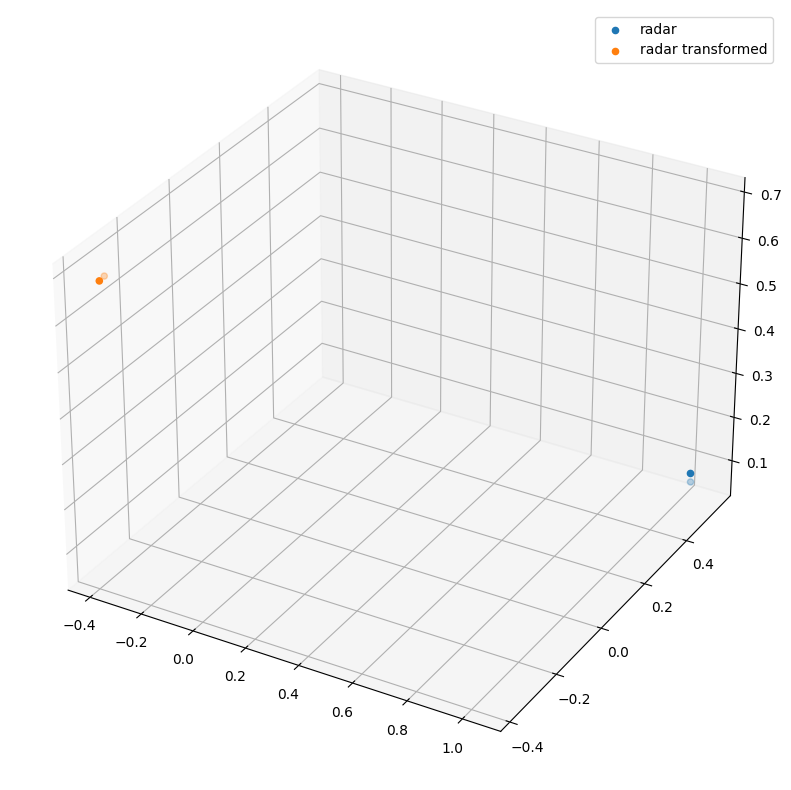

In [305]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(*radar1_xyz.T, label='radar')
ax.scatter(*radar1_xyz_tr.T, label='radar transformed')
ax.legend(loc=0)
plt.show()

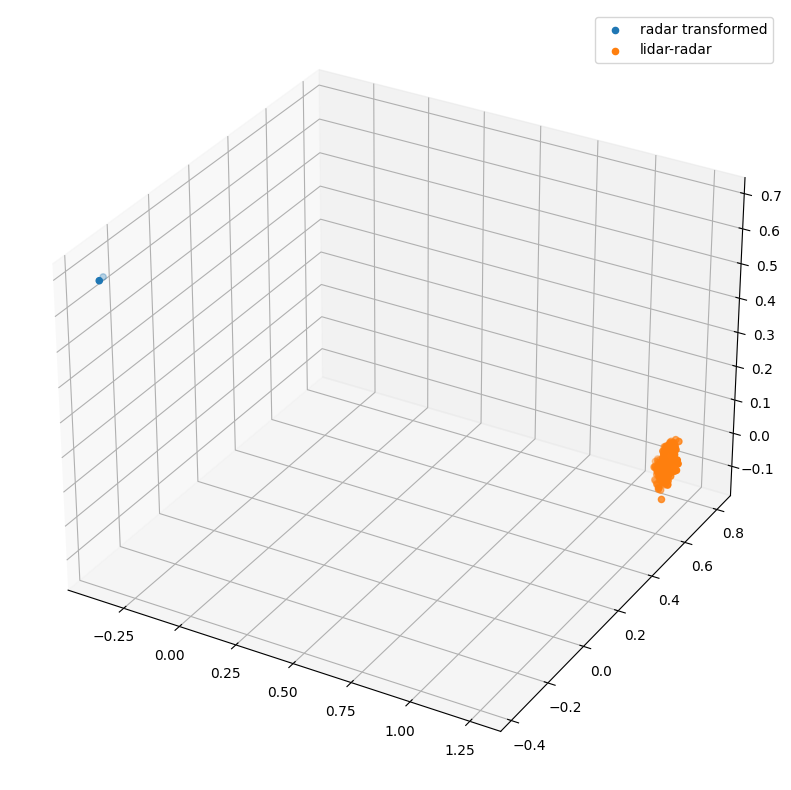

In [311]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# ax.scatter(*radar1_xyz.T, label='radar')
ax.scatter(*radar1_xyz_tr.T, label='radar transformed')
# ax.scatter(*get_neaerest_lidar(lidar_xyz, radar1_xyz_tr).T, label='lidar-radar-tr')
ax.scatter(*get_neaerest_lidar(lidar_xyz, radar1_xyz).T, label='lidar-radar')
ax.legend(loc=0)
plt.show()

In [325]:
lidar_xyz

array([[ -0.6577976 ,   0.3299749 ,  -0.34316605],
       [ -1.0003775 ,   0.38481018,  -0.01870898],
       [ -1.0006789 ,   0.50197643,  -0.0325814 ],
       ...,
       [-12.215904  ,   5.561956  ,   3.5965497 ],
       [-11.478639  ,   5.919491  ,   2.3547544 ],
       [ -0.9972064 ,   0.45403254,  -0.0254964 ]], dtype=float32)

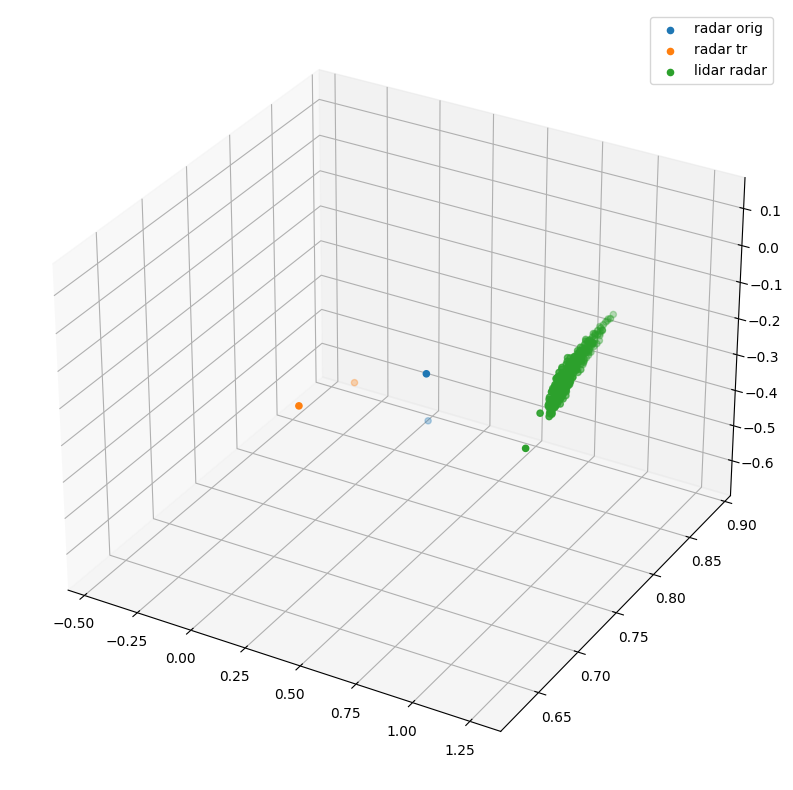

In [338]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
#ax.scatter(*lidar_xyz.T, alpha=.005, label='lidar')
ax.scatter(*radar_xyz.T, label='radar orig')
ax.scatter(*radar_xyz_tr.T, label='radar tr')
ax.scatter(*lidar_radar_xyz.T, label='lidar radar')
ax.legend(loc=0)